# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [2]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [3]:

def create_array(rows, cols):
    # Calculate the total number of elements
    total_elements = rows * cols
    
    # Create an array filled with zeros
    array = np.zeros(total_elements)
    
    # Reshape the array to the desired shape
    array = array.reshape((rows, cols))
    
    return array
def euclidean_distance(point1, point2):
    point1 = np.array(point1)
    point2 = np.array(point2)
    return np.linalg.norm(point1 - point2)
def pearson_correlation_distance(point1, point2):
    point1 = np.array(point1)
    point2 = np.array(point2)
    
    # Calculate the means of each point
    mean1 = np.mean(point1)
    mean2 = np.mean(point2)
    
    # Calculate the Pearson correlation coefficient
    numerator = np.sum((point1 - mean1) * (point2 - mean2))
    denominator = np.sqrt(np.sum((point1 - mean1) ** 2) * np.sum((point2 - mean2) ** 2))
    
    # Handle division by zero case
    if denominator == 0:
        return 0
    else:
        return 1 - (numerator / denominator)
def GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type ):
# ## write code here for the Distance function here #
    arr=create_array(len(Data_points),len(Cluster_Centroids))
    for j in range(len(Data_points)):                
        for i in range(len(Cluster_Centroids)):
            if Distance_Type == "euclidean":
        
                arr[j][i]=euclidean_distance(Data_points[j],Cluster_Centroids[i])
                #print("distance between "+str(Data_points[j])+"and "+str(Cluster_Centroids[i])+"is "+str(euclidean_distance(Data_points[j],Cluster_Centroids[i])))
            else:
                arr[j][i]=pearson_correlation_distance(Data_points[j],Cluster_Centroids[i])
    return arr   


> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [7]:


def create_array(rows, cols):
    # Calculate the total number of elements
    total_elements = rows * cols
    
    # Create an array filled with zeros
    array = np.zeros(total_elements)
    
    # Reshape the array to the desired shape
    array = array.reshape((rows, cols))
    
    return array
def min_of_each_column(array_2d):
    # Convert the list of lists to a NumPy array
    array_2d = np.array(array_2d)
    
    # Find the minimum element of each column
    min_values = np.min(array_2d, axis=0)
    
    return min_values
def max_of_each_column(array_2d):
    # Convert the list of lists to a NumPy array
    array_2d = np.array(array_2d)
    
    # Find the minimum element of each column
    min_values = np.max(array_2d, axis=0)
    
    return min_values
def generate_random_arr(min,max,clusternum):#to get random cluster centroid within specified range of data and returns it
    arr2=[]
    for j in range(clusternum):
        arr1=[]
        for i in range(len(min)):
            arr1.append(np.random.uniform(min[i], max[i]))

        arr2.append(arr1)
    return np.array(arr2)
def find_minimum_index_in_each_row(arr):#this function is to get the cluster of each point in our data 
    #and it is returning an array containing cluster heads for each data point (accprding to their order in array)
    min_indices = []
    for row in arr:
        min_index = np.argmin(row)
        min_indices.append(min_index)
    return np.array(min_indices)
def getting_mean_square(min_index_arr,distance_arr,clusternum): # this one is returning mean square for every cluster using an array data type  
    #(every element is the mean square of corresponding cluster)
    total=0
    for k in range(clusternum):
        sum=0
        count=0
        for i in min_index_arr:
            if min_index_arr[i]==k:
                sum=sum+distance_arr[i][k]**2
                count=count+1
        total=total+sum/count
    return total
def mean_of_array_of_arrays(array_of_arrays): # this one is used to update the centroid of each cluster depending on the mean of its data points
    # Convert the list of lists to a NumPy array
    array_2d = np.array(array_of_arrays)

    # Calculate the mean along the rows (axis=0)
    mean_values = np.mean(array_2d, axis=0)
    
    return mean_values
def getting_new_centroids(min_index_arr,data,clusternum,old_centers): # this one is returning new centroid heads based on data in each cluster 
    #(array containing new clusetr heads)
    new_centroids=[]
    for k in range(clusternum):
        arr=[]
        for j in range(len(min_index_arr)):
            if min_index_arr[j]==k:
                arr.append(data[j])
        if (len(arr)>0):
            new_centroids.append(mean_of_array_of_arrays(arr))
        else:
            new_centroids.append(old_centers[k])
    return np.array(new_centroids)
def distortion(data, centroids, assignments): ## takes min_idx_Array(assignment),list of centroids,list of data and returns distortion of the whole data from their corresponding cluster heads
    total_distortion = 0
    for i in range(len(centroids)):
        cluster_points = [data[j] for j in range(len(data)) if assignments[j] == i]
        for point in cluster_points:
            total_distortion += euclidean_distance(point, centroids[i])**2
    return total_distortion


def GUC_Kmean ( Data_points, Number_of_Clusters,  Distance_Type ): 
        #this lines is for generating random cluster heads at the start of the algorithm
        min = min_of_each_column(Data_points)
        max = max_of_each_column(Data_points)
        old_clusters = generate_random_arr(min,max,Number_of_Clusters)
        
        prev_res = 1000000000
        ###
        while (True):
            Distance =GUC_Distance( old_clusters, Data_points, Distance_Type )
            min_idx = find_minimum_index_in_each_row(Distance)
            new_res=distortion(Data_points,old_clusters,min_idx)
            if abs(new_res-prev_res) <= 1e-4 :
                break
            prev_res = new_res
            clusters=getting_new_centroids(min_idx,Data_points,Number_of_Clusters,old_clusters)
            old_clusters=clusters
            # Distance =GUC_Distance ( clusters, Data_points, Distance_Type )
            # min_idx = find_minimum_index_in_each_row(Distance)
            # prev_res=getting_mean_square(min_idx,Distance,Number_of_Clusters)
        SSE=new_res
        

        return [Data_points,min_idx, clusters , SSE ]   




    # cluster_arr=generate_random_arr(min_of_each_column(Data_points),max_of_each_column(Data_points),Number_of_Clusters)
    # GUC_Distance=GUC_Distance(cluster_arr,Data_points,Distance_Type)
    # minIdx=find_minimum_index_in_each_row(GUC_Distance)
    # CLUSTER_MEAN_SQR=getting_mean_square(minIdx,GUC_Distance,Number_of_Clusters)
    

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [5]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [12]:
def display_cluster(X, data_centers=None, data_labels=None, num_clusters=0):
    color = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#00FFFF', '#FF00FF', '#800000', '#008000', '#000080', '#808000', '#008080', '#800080']
    no_of_features = X.shape[1]
    plt.rcParams['figure.figsize'] = [10,3]

    if no_of_features != 2:
        for i in range(no_of_features-1):
            for j in range(i+1, no_of_features):
                fig,ax = plt.subplots()  
                if data_centers is not None and data_labels is not None:  
                    for k in range(num_clusters):
                        ax.scatter(data_centers[:, i][k], data_centers[:, j][k], c=color[k], marker='s', s=20)
                        ax.scatter(X[data_labels == k, i], X[data_labels == k, j], c=color[k], alpha=0.5, s=20)
                        ax.set_xlabel('Feature ' + str(i+1))
                        ax.set_ylabel('Feature ' + str(j+1))
                        
                    ax.set_title('Clustered Data with ' + str(num_clusters) + ' Clusters')
                else:
                     ax.scatter(X[:, i], X[:, j], c=color[0], alpha=0.5, s=20)
                     ax.set_xlabel('Feature ' + str(i+1))
                     ax.set_ylabel('Feature ' + str(j+1))
                     ax.set_title('Original Data')
                plt.show();
    
    else:  
        fig, ax = plt.subplots()  
       
        if data_centers is not None and data_labels is not None:  
            for k in range(num_clusters):
                ax.scatter(data_centers[:, 0][k], data_centers[:, 1][k], c=color[k], marker='s', s=20)
                
                ax.scatter(X[data_labels == k, 0], X[data_labels == k, 1], c=color[k], alpha=0.5, s=20)
                
                ax.set_xlabel('Feature 1')
                ax.set_ylabel('Feature 2')
            
            ax.set_title('Clustered Data with ' + str(num_clusters) + ' Clusters')
        else:
            ax.scatter(X[:, 0], X[:, 1], c=color[0], alpha=0.5, s=20)
            ax.set_xlabel('Feature 1')
            ax.set_ylabel('Feature 2')
            ax.set_title('Original Data')
        
        plt.show();


> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

arriv


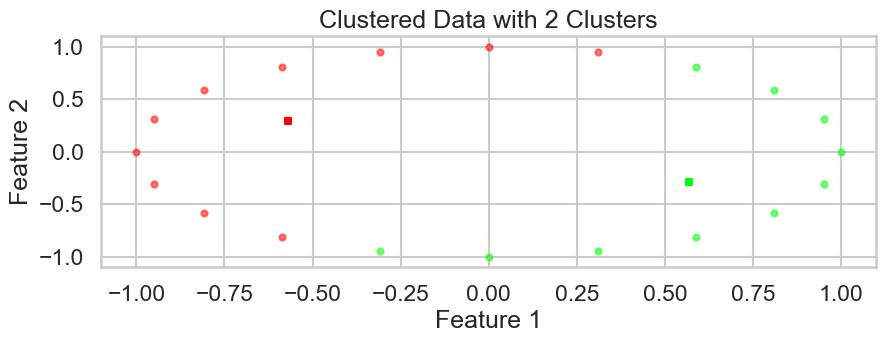

arriv


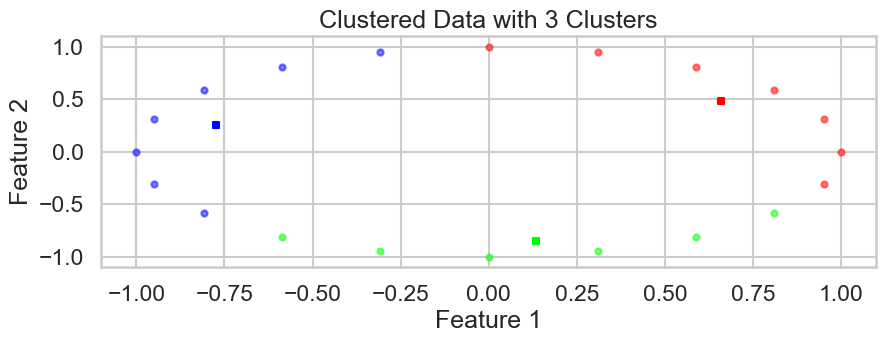

arriv


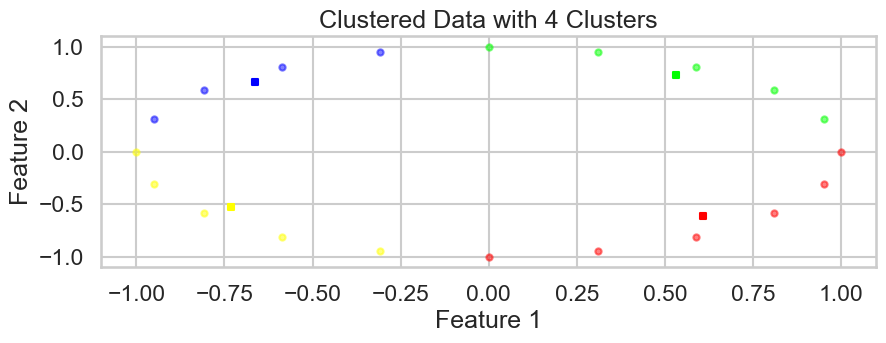

arriv


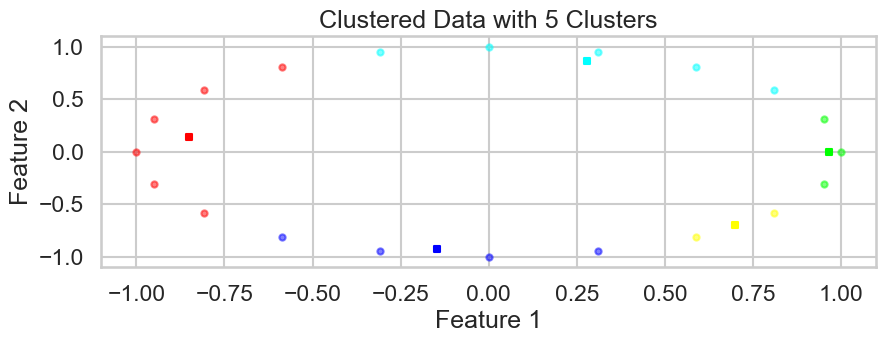

arriv


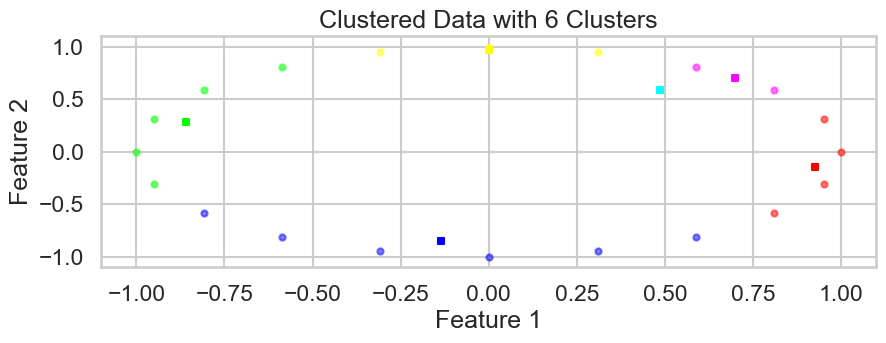

arriv


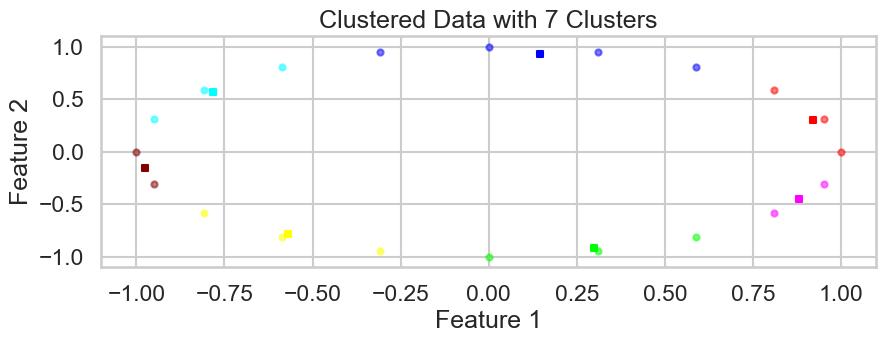

arriv


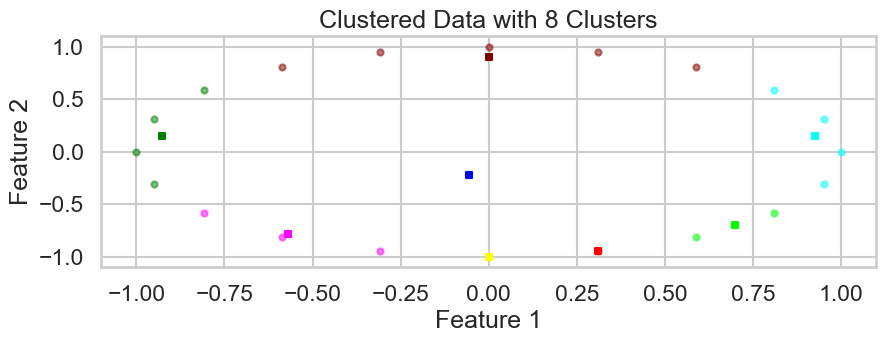

arriv


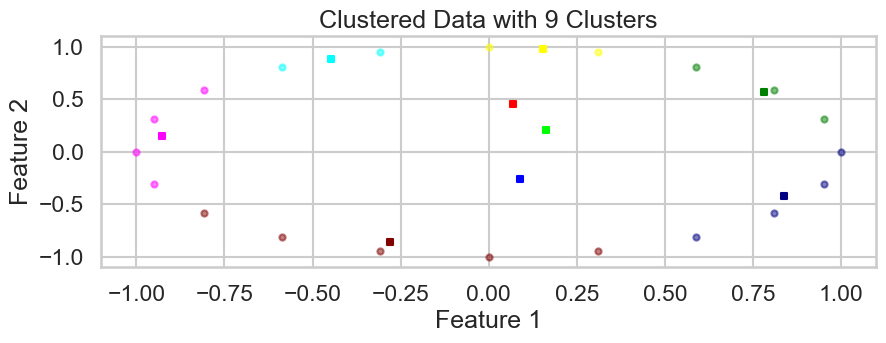

arriv


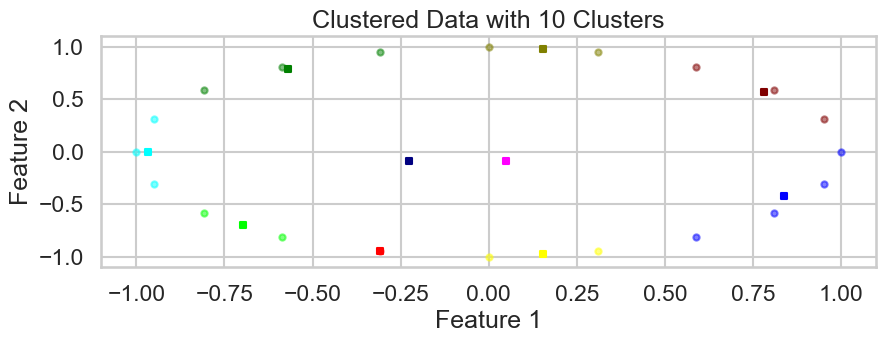

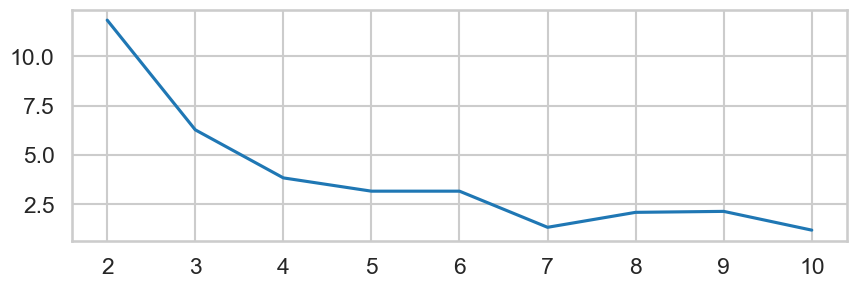

In [18]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X_1 = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
clusters_num=np.arange(2,11)
SSE_draw=np.zeros(9,dtype=float)
for k in range(2,11):
    Data_points,cluster_assignments, centroids , SSE = GUC_Kmean(X_1,k,'euclidean')
    display_cluster(X_1,centroids,cluster_assignments,num_clusters=k)
    SSE_draw[k-2]=SSE
plt.figure();
plt.plot(clusters_num,SSE_draw);
plt.show();

> #### 2.3. Example 2 : Multi blob Data Gen and display 

arriv


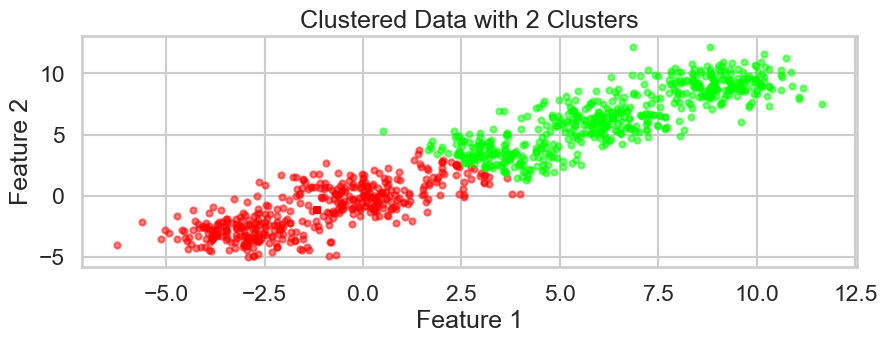

arriv


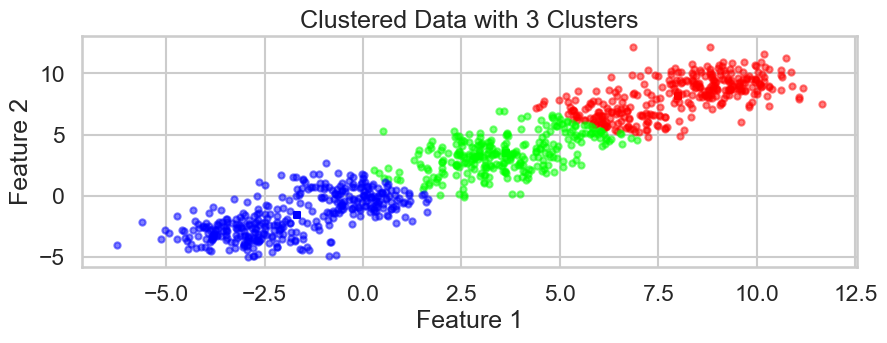

arriv


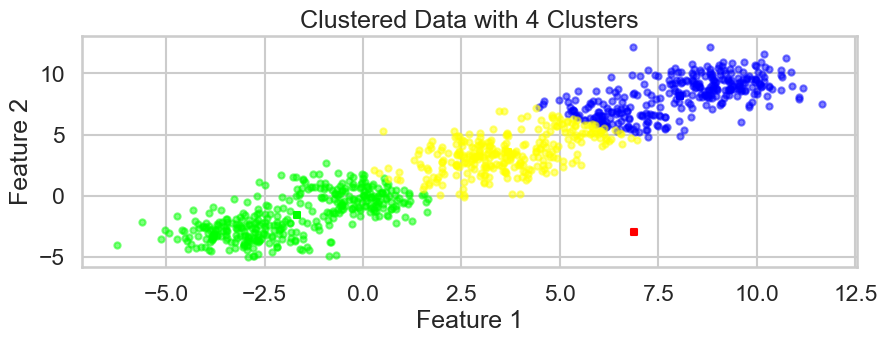

arriv


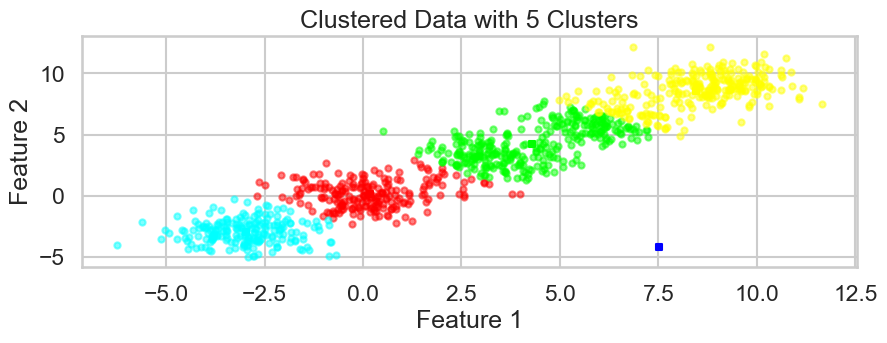

arriv


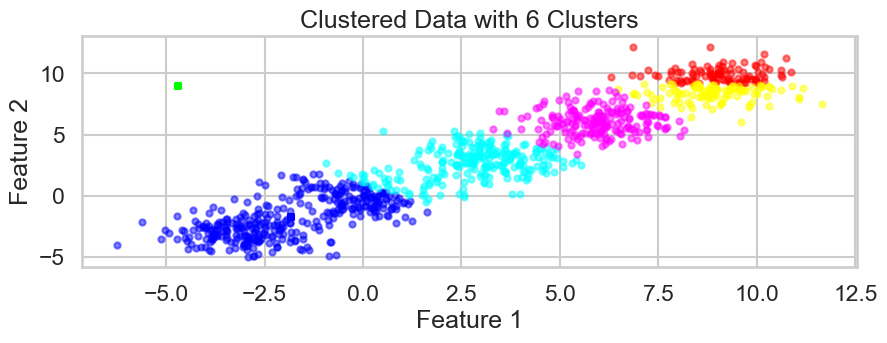

arriv


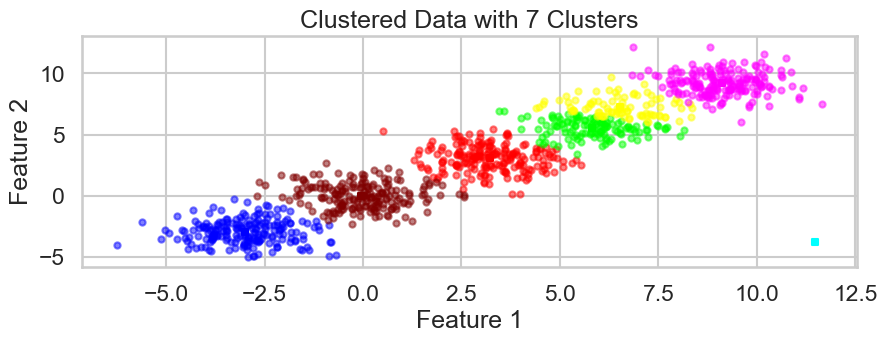

arriv


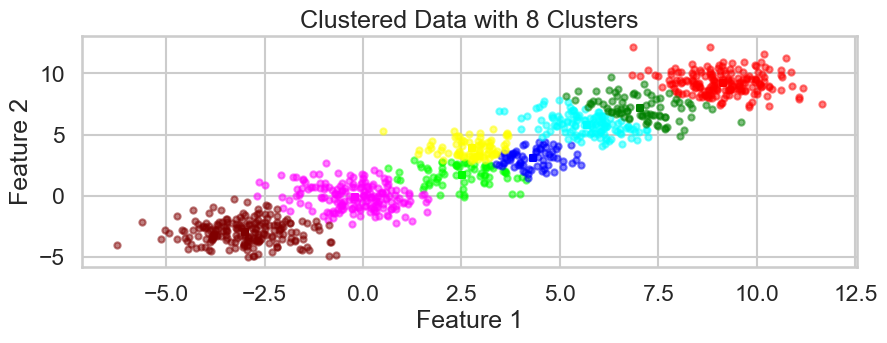

arriv


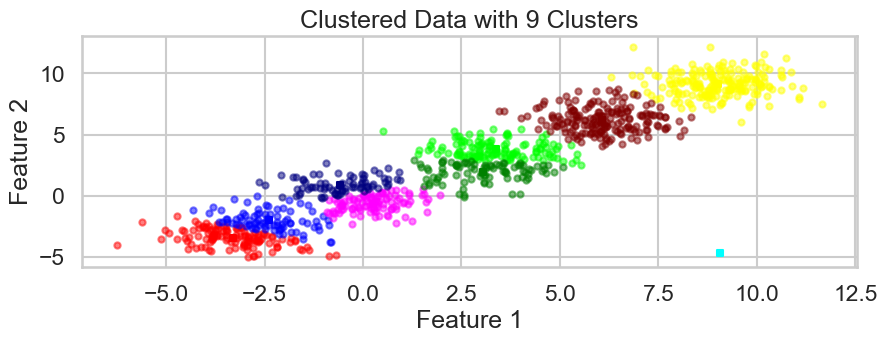

arriv


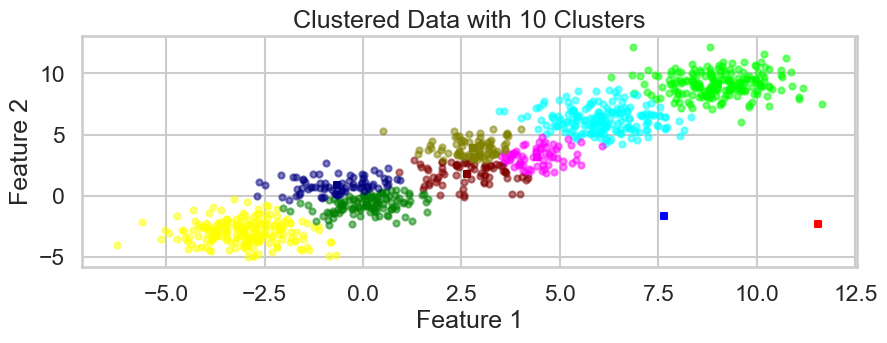

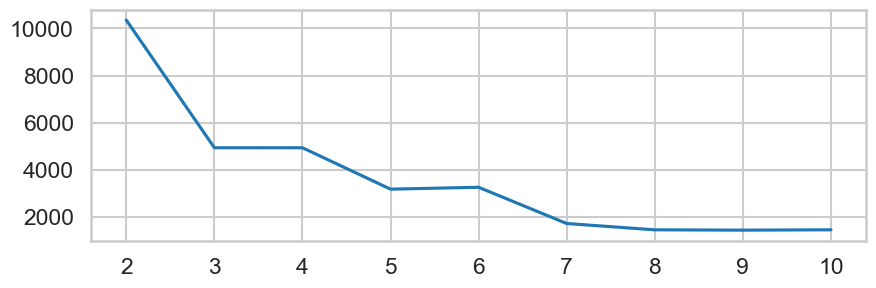

In [19]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X_2, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
clusters_num=np.arange(2,11)
SSE_draw=np.zeros(9,dtype=float)
for k in range(2,11):
    Data_points,cluster_assignments, centroids , SSE = GUC_Kmean(X_2,k,'euclidean')
    display_cluster(X_2,centroids,cluster_assignments,num_clusters=k)
    SSE_draw[k-2]=SSE
plt.figure();
plt.plot(clusters_num,SSE_draw);
plt.show();

#### 2.3. Example 3 : moons Data Gen and display 

arriv


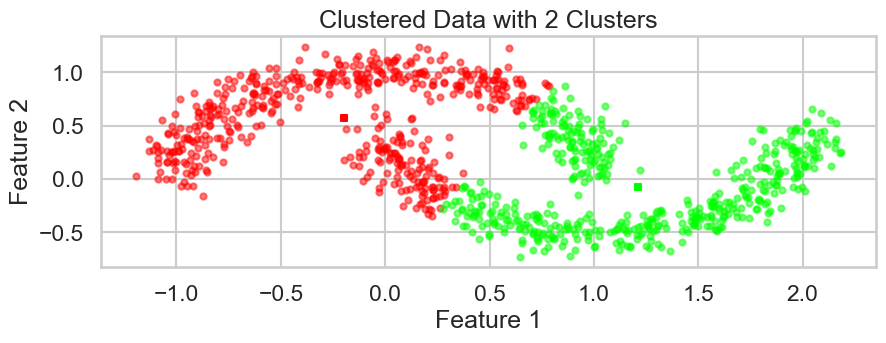

arriv


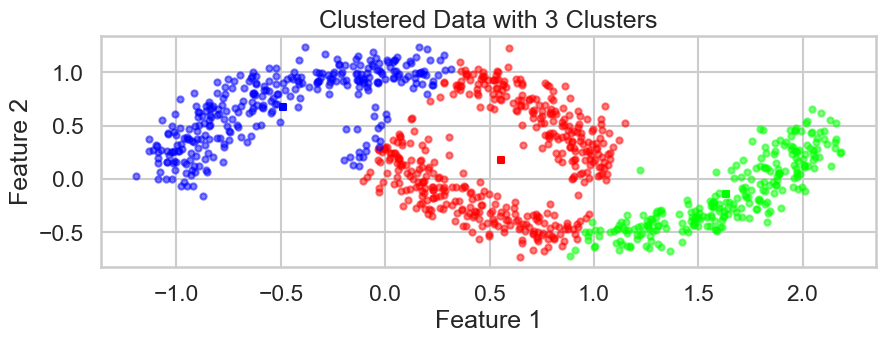

arriv


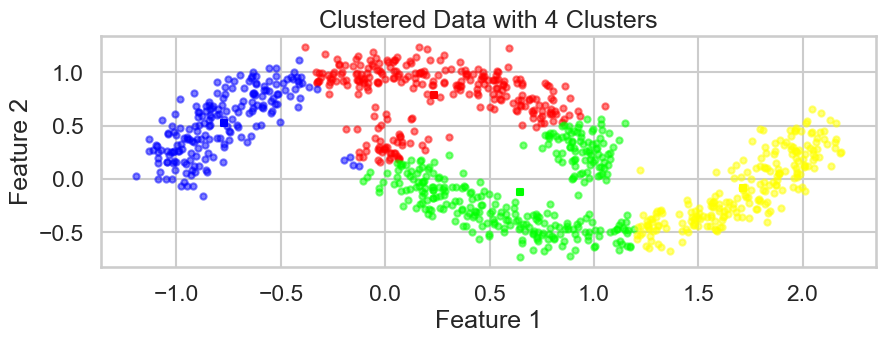

arriv


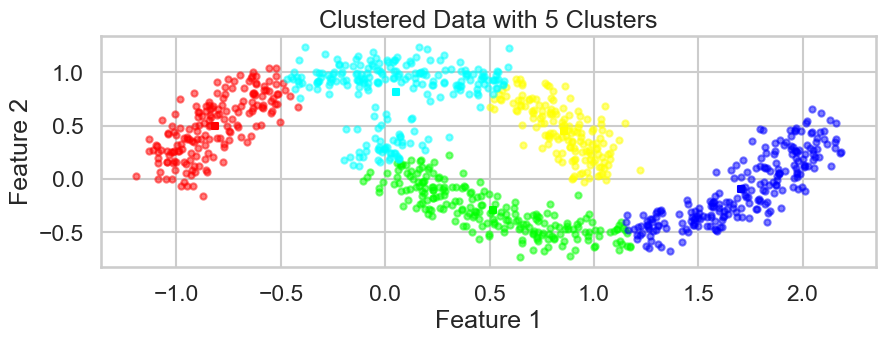

arriv


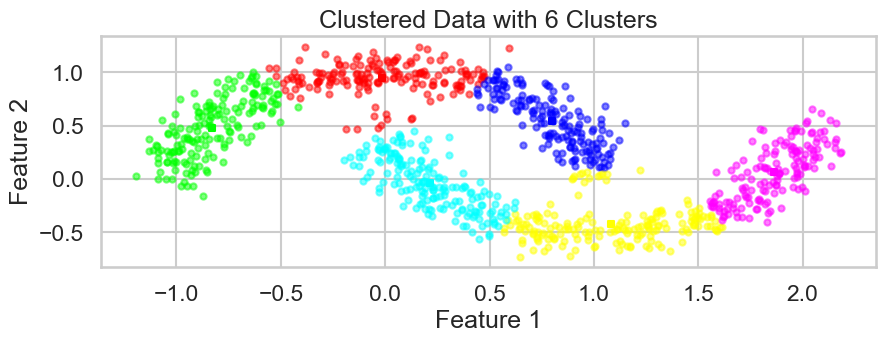

arriv


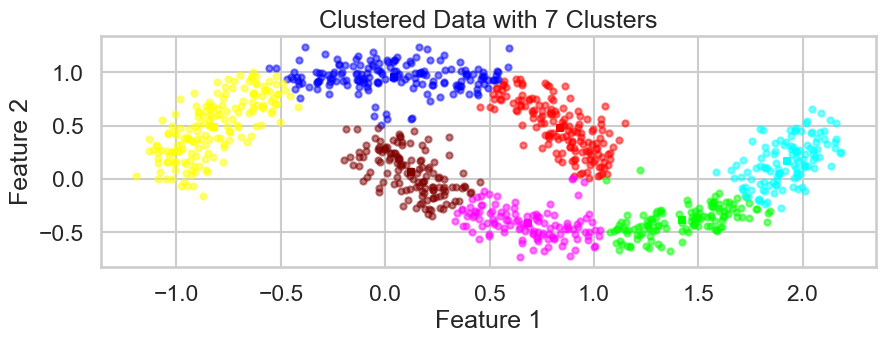

arriv


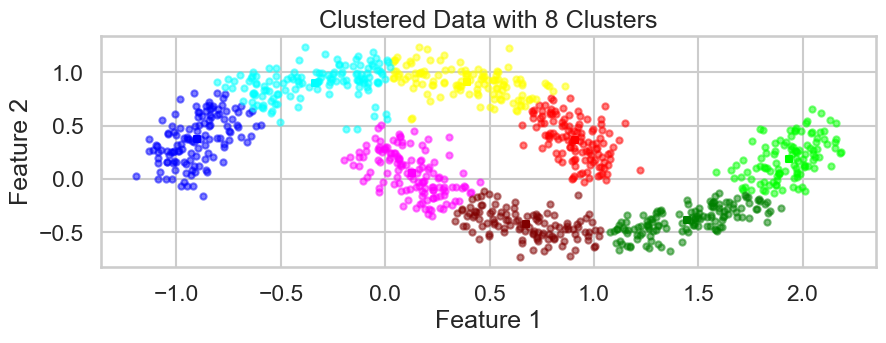

arriv


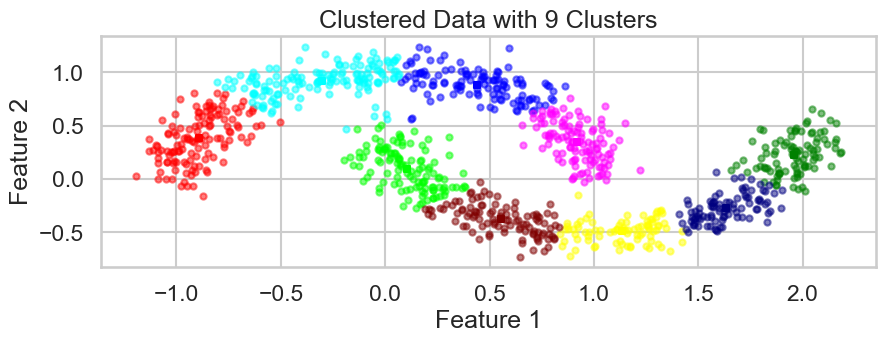

arriv


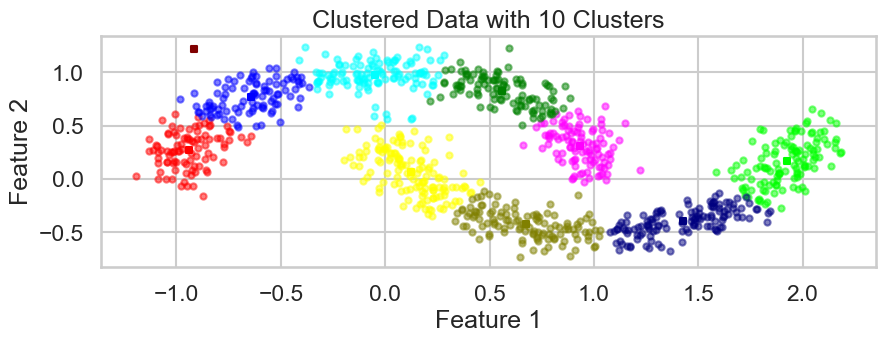

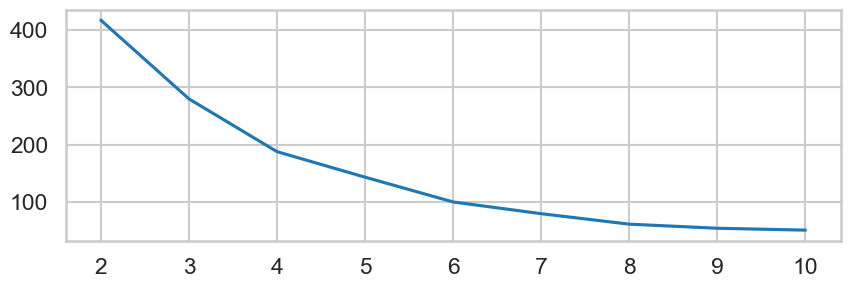

In [20]:
n_samples = 1000
X_3, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
clusters_num=np.arange(2,11)
SSE_draw=np.zeros(9,dtype=float)
for k in range(2,11):
    Data_points,cluster_assignments, centroids , SSE = GUC_Kmean(X_3,k,'euclidean')
    display_cluster(X_3,centroids,cluster_assignments,num_clusters=k)
    SSE_draw[k-2]=SSE
plt.figure();
plt.plot(clusters_num,SSE_draw);
plt.show();

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [ ]:
cluster_assignments , example_centroids, example_SSE=GUC_Kmean( X_1, 2,  'euclidean' )
display_cluster(X_1, data_centers=example_centroids, data_labels=cluster_assignments, num_clusters=2)

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [26]:
Dp=np.loadtxt("F:/My_sem_10/sem10_my_material/Machine_learning/assignments/kmeans_assignment/Customer_data.csv",delimiter=",",skiprows=1,dtype=float)
print(Dp)
clusters_num=np.arange(2,11)
SSE_draw=np.zeros(9,dtype=float)
for k in range(2,11):
    Data_points,cluster_assignments, centroids , SSE = GUC_Kmean(Dp,k,'euclidean')
    display_cluster(Dp,centroids,cluster_assignments,num_clusters=k)
    SSE_draw[k-2]=SSE
plt.figure();
plt.plot(clusters_num,SSE_draw);
plt.show();

ValueError: could not convert string 'ID' to float64 at row 0, column 1.